In [1]:
#Preamble
readr::read_csv("/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv") -> coffee
library(tidyverse)


New names:
• `` -> `...1`
Rows: 207 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (22): Country of Origin, Farm Name, Lot Number, Mill, ICO Number, Compan...
dbl (19): ...1, ID, Number of Bags, Aroma, Flavor, Aftertaste, Acidity, Body...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
coffee%>%select(!c("...1")) -> coffee
coffee%>%select(!c("ID")) -> coffee
colnames(coffee)
stringr::str_replace_all(colnames(coffee), pattern = " ", replacement = "_") -> colnames(coffee)


[1] "Country of Origin"     "Farm Name"             "Lot Number"           
 [4] "Mill"                  "ICO Number"            "Company"              
 [7] "Altitude"              "Region"                "Producer"             
[10] "Number of Bags"        "Bag Weight"            "In-Country Partner"   
[13] "Harvest Year"          "Grading Date"          "Owner"                
[16] "Variety"               "Status"                "Processing Method"    
[19] "Aroma"                 "Flavor"                "Aftertaste"           
[22] "Acidity"               "Body"                  "Balance"              
[25] "Uniformity"            "Clean Cup"             "Sweetness"            
[28] "Overall"               "Defects"               "Total Cup Points"     
[31] "Moisture Percentage"   "Category One Defects"  "Quakers"              
[34] "Color"                 "Category Two Defects"  "Expiration"           
[37] "Certification Body"    "Certification Address" "Certification Contact"

# Forging Data for Standart Conventions

Drop a few columns due to overwhelming identification.

In [3]:
str(coffee)
coffee%>%select(!c("Lot_Number","ICO_Number","Number_of_Bags",
                   "Bag_Weight","Expiration","Certification_Body","Certification_Address")) -> coffee


tibble [207 × 39] (S3: tbl_df/tbl/data.frame)
 $ Country_of_Origin    : chr [1:207] "Colombia" "Taiwan" "Laos" "Costa Rica" ...
 $ Farm_Name            : chr [1:207] "Finca El Paraiso" "Royal Bean Geisha Estate" "OKLAO coffee farms" "La Cumbre" ...
 $ Lot_Number           : chr [1:207] "CQU2022015" "The 2022 Pacific Rim Coffee Summit,T037" "The 2022 Pacific Rim Coffee Summit,LA01" "CQU2022017" ...
 $ Mill                 : chr [1:207] "Finca El Paraiso" "Royal Bean Geisha Estate" "oklao coffee processing plant" "La Montana Tarrazu MIll" ...
 $ ICO_Number           : chr [1:207] NA NA NA NA ...
 $ Company              : chr [1:207] "Coffee Quality Union" "Taiwan Coffee Laboratory" "Taiwan Coffee Laboratory" "Coffee Quality Union" ...
 $ Altitude             : chr [1:207] "1700-1930" "1200" "1300" "1900" ...
 $ Region               : chr [1:207] "Piendamo,Cauca" "Chiayi" "Laos Borofen Plateau" "Los Santos,Tarrazu" ...
 $ Producer             : chr [1:207] "Diego Samuel Bermudez" "曾福森" "W

## Numeric Columns

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


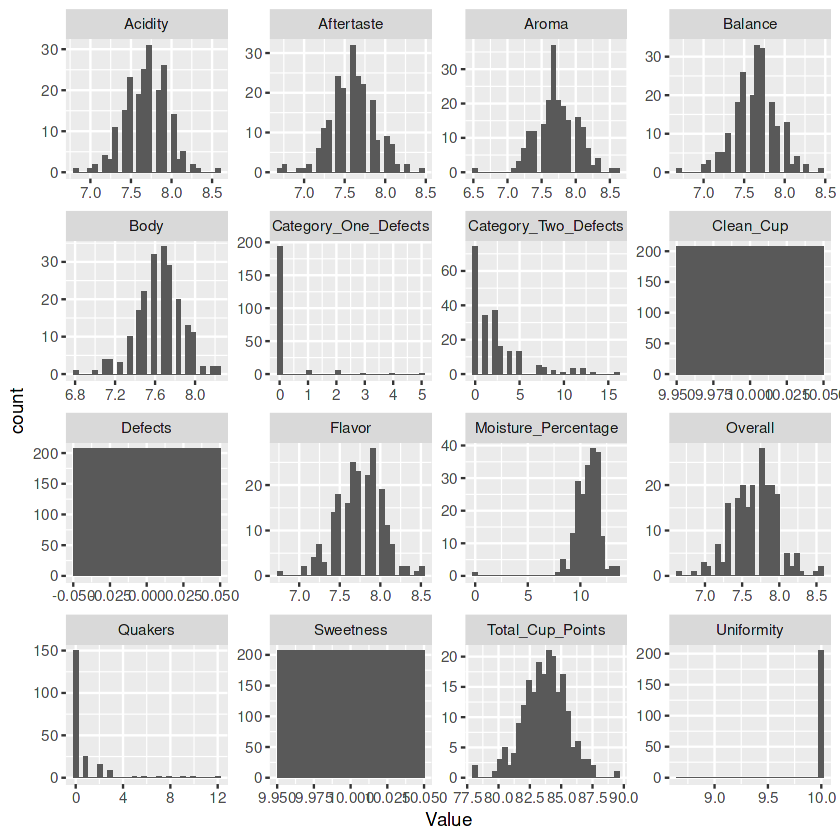

In [4]:

coffee[,unlist(lapply(coffee, is.numeric))] -> coffee_numeric
coffee_numeric%>%pivot_longer(cols = colnames(coffee_numeric), values_to = "Value", names_to = "Specs")%>%
    group_by(Specs)%>%ggplot(mapping = aes(x = Value)) + 
    geom_histogram() + facet_wrap(~Specs, scales = "free")




No variance in some columns. 

In [5]:
unique(coffee_numeric$Sweetness)
unique(coffee_numeric$Clean_Cup)
unique(coffee_numeric$Defects)

[1] 10

[1] 10

[1] 0

We are getting off graphs due to fact that there exists only one type of level or numeric score in these columns. There exists skewed distributions in few columns such as Category_One_Defects, Unifortmiy, Category TWo Defects, Quakeres and Moisture Percentage. No variance needs no explanation since we can group all variables under one category even if they are numeric. Therefore, we have decided to drop those columns.

In [6]:
coffee_numeric%>%select(!c("Sweetness","Defects","Clean_Cup")) -> coffee_numeric
coffee%>%select(!c("Sweetness","Defects","Clean_Cup")) -> coffee

## Non-Numeric Columns

In [7]:
coffee[,!unlist(lapply(coffee,is.numeric))] -> coffee_non_numeric

Now we can forge the dataset in a more cleaner format. For example, 

* Instead of using a character variable of altitude we can make it a numeric variable or a factor variable (e.g. High Altitude, Mid High, Mid, etc.). 

* We can also drop the columns with company information since we won't cover the company information and its relationship. It is better to focus on countries alone due to the scope of this work. 

* We can factorize the variables such as processing method, or the color. 

* We can factorize the harvest year also, since some rows contain mid values such as 2021-2022. To explain the taste relationship and year according to the regions. 

* Finally we can count variables in a histogram to remove the columns with zero variance since they have no explanation power. 


In [8]:
str(coffee_non_numeric)

tibble [207 × 16] (S3: tbl_df/tbl/data.frame)
 $ Country_of_Origin    : chr [1:207] "Colombia" "Taiwan" "Laos" "Costa Rica" ...
 $ Farm_Name            : chr [1:207] "Finca El Paraiso" "Royal Bean Geisha Estate" "OKLAO coffee farms" "La Cumbre" ...
 $ Mill                 : chr [1:207] "Finca El Paraiso" "Royal Bean Geisha Estate" "oklao coffee processing plant" "La Montana Tarrazu MIll" ...
 $ Company              : chr [1:207] "Coffee Quality Union" "Taiwan Coffee Laboratory" "Taiwan Coffee Laboratory" "Coffee Quality Union" ...
 $ Altitude             : chr [1:207] "1700-1930" "1200" "1300" "1900" ...
 $ Region               : chr [1:207] "Piendamo,Cauca" "Chiayi" "Laos Borofen Plateau" "Los Santos,Tarrazu" ...
 $ Producer             : chr [1:207] "Diego Samuel Bermudez" "曾福森" "WU TAO CHI" "Santa Maria de Dota" ...
 $ In-Country_Partner   : chr [1:207] "Japan Coffee Exchange" "Taiwan Coffee Laboratory 台灣咖啡研究室" "Taiwan Coffee Laboratory 台灣咖啡研究室" "Japan Coffee Exchange" ...
 $ Harves

In [9]:
for(i in 1:length(coffee_non_numeric$Altitude)){

    if(is.na(coffee_non_numeric$Altitude[i])){
        coffee_non_numeric$Altitude[i] <- NA
    } else {
        coffee_non_numeric$Altitude[i] <- substr(coffee_non_numeric$Altitude[i],1,4)
    }
}

#Somerows contain three digits instead of for, we can remove the dash. 
stringr::str_remove(coffee_non_numeric$Altitude, pattern = "-") -> coffee_non_numeric$Altitude
readr::parse_number(coffee_non_numeric$Altitude) -> coffee_non_numeric$Altitude

# We took the base altitude as the value for cases where altitude is an interval. 



Let us drop the company information. Also "Status" column doesn't have any variance therefore, we are going to drop it too. 

In [10]:
coffee_non_numeric%>%select(!c("Company",
                               "Producer","In-Country_Partner","Grading_Date",
                               "Owner","Status","Certification_Contact")) -> coffee_non_numeric

str(coffee_non_numeric)

##Let's carry the just-made numeric column altitude to numerical data frame
coffee_numeric$Altitude <- coffee_non_numeric$Altitude

## Let us Factorize the Columns
coffee_non_numeric%>%select(!c("Altitude")) -> coffee_non_numeric
lapply(coffee_non_numeric, as.factor) -> coffee_non_numeric

tibble [207 × 9] (S3: tbl_df/tbl/data.frame)
 $ Country_of_Origin: chr [1:207] "Colombia" "Taiwan" "Laos" "Costa Rica" ...
 $ Farm_Name        : chr [1:207] "Finca El Paraiso" "Royal Bean Geisha Estate" "OKLAO coffee farms" "La Cumbre" ...
 $ Mill             : chr [1:207] "Finca El Paraiso" "Royal Bean Geisha Estate" "oklao coffee processing plant" "La Montana Tarrazu MIll" ...
 $ Altitude         : num [1:207] 1700 1200 1300 1900 1850 ...
 $ Region           : chr [1:207] "Piendamo,Cauca" "Chiayi" "Laos Borofen Plateau" "Los Santos,Tarrazu" ...
 $ Harvest_Year     : chr [1:207] "2021 / 2022" "2021 / 2022" "2021 / 2022" "2022" ...
 $ Variety          : chr [1:207] "Castillo" "Gesha" "Java" "Gesha" ...
 $ Processing_Method: chr [1:207] "Double Anaerobic Washed" "Washed / Wet" "Semi Washed" "Washed / Wet" ...
 $ Color            : chr [1:207] "green" "blue-green" "yellowish" "green" ...


In [11]:
str(coffee_non_numeric)

##Combine The Forged Datasets.

cbind(coffee_non_numeric, coffee_numeric) -> coffee
## We use this for future applications, nonetheless we will also use just non-numeric dataset and the numeric dataset. 

List of 8
 $ Country_of_Origin: Factor w/ 22 levels "Brazil","Colombia",..: 2 17 10 3 2 6 17 17 17 18 ...
 $ Farm_Name        : Factor w/ 172 levels "-","917農場 (917 Farm)",..: 40 95 89 70 46 68 163 118 119 81 ...
 $ Mill             : Factor w/ 162 levels "5.2Ha","917農場 (917 Farm)",..: 51 95 86 69 54 33 153 111 113 56 ...
 $ Region           : Factor w/ 120 levels "( Dongshan Dist., Tainan City)",..: 79 27 53 57 81 28 27 27 27 49 ...
 $ Harvest_Year     : Factor w/ 7 levels "2017 / 2018",..: 4 4 4 5 5 5 4 4 4 6 ...
 $ Variety          : Factor w/ 48 levels "Bourbon","Bourbon Sidra",..: 5 20 21 20 30 20 20 39 38 1 ...
 $ Processing_Method: Factor w/ 10 levels "Anaerobico 1000h",..: 2 9 7 9 4 9 9 5 9 9 ...
 $ Color            : Factor w/ 12 levels "blue-green","bluish-green",..: 5 1 12 5 11 5 5 9 6 6 ...


# Explanatory Data Analysis
In this section, we will uncover the relationships between numeric variables.  Understanding the data and using unsupervised learning to discover the different properties is helpful.  First, we are going to elaborate on the correlation. We can reduce the dimensions to completely correlated values. 



# Correlation Between Numeric Variables

Let us start with the case of correlation. In the first graph, we can see all the taste variables are correlated with each other. This means that if the aroma score of a coffee is high, its flavor score is expected to be also high. The second and third graph also shows the taste values of different coffees across the dataset, while the x-axis represents the row. Since they are correlated with each other, they are naturally correlated when we check the relationship with other variables, such as altitude. This relationship can be seen in the 4th graph. The lines in the final graph represent the mean of the variables, and we can see a high correlation between these variables. 



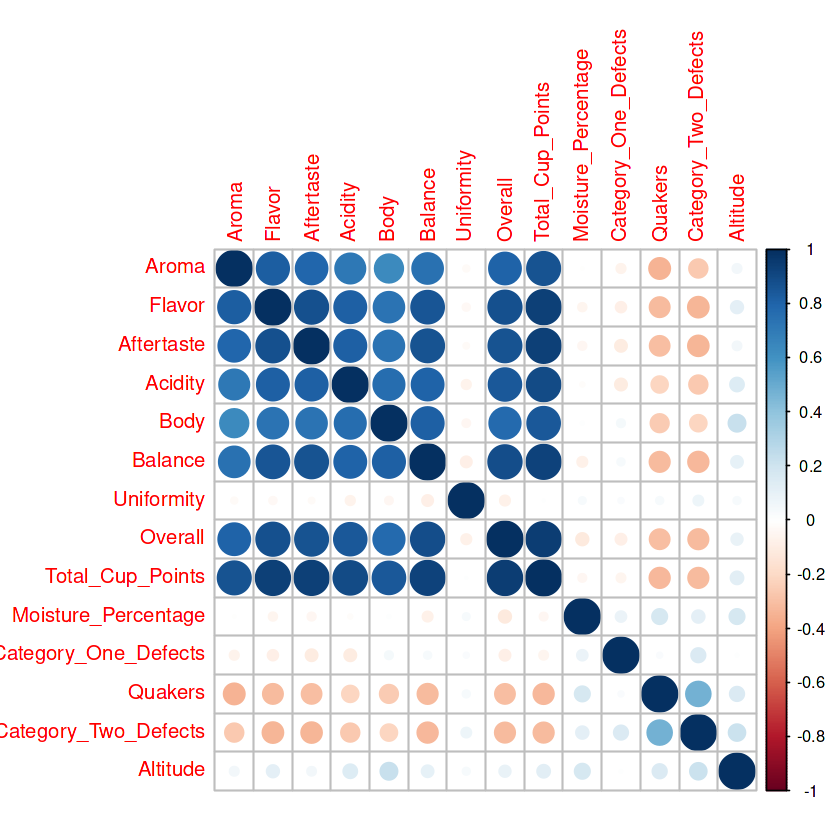

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


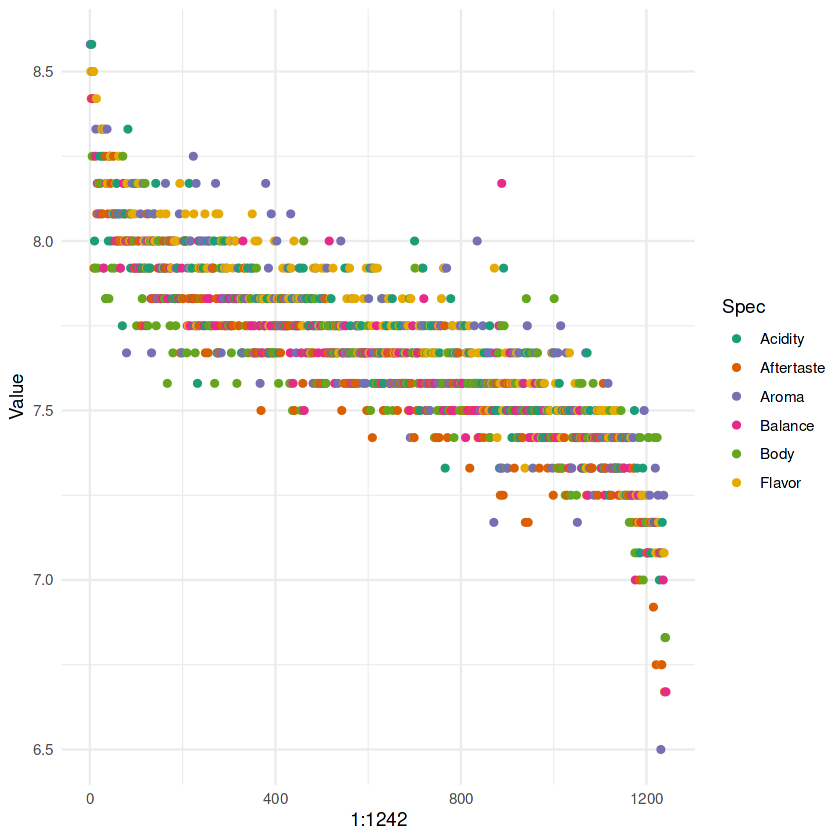

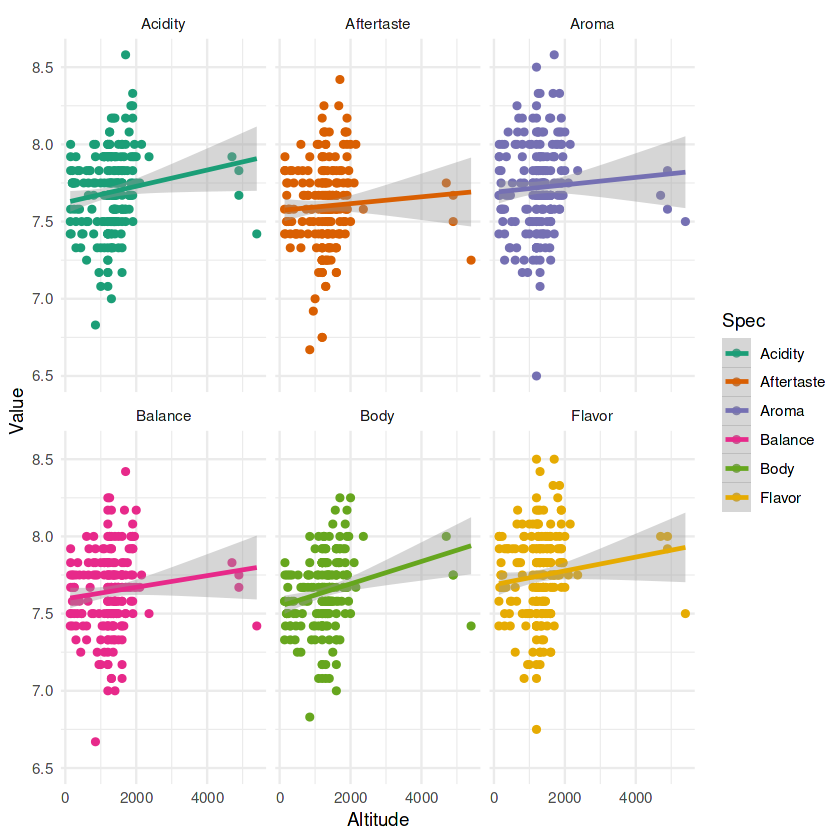

In [12]:
corrplot::corrplot(cor(na.omit(coffee_numeric)))
coffee_numeric%>%select(c("Aroma","Flavor","Aftertaste","Acidity","Body","Balance")) -> coffee_numeric_taste




pivot_longer(coffee_numeric_taste,cols = c("Aroma","Flavor","Aftertaste","Acidity","Body","Balance"),names_to = "Spec",values_to = "Value")%>%
    group_by(Spec)%>%ggplot(mapping = aes(x = 1:1242, y = Value, color = Spec)) + geom_point() + theme_minimal() + scale_color_brewer(palette = "Dark2")





coffee%>%select(c("Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Altitude"))%>%
pivot_longer(cols =c("Aroma","Flavor","Aftertaste","Acidity","Body","Balance"), names_to = "Spec",values_to =  "Value")%>% group_by(Spec)%>%
ggplot(mapping =  aes(x = Altitude, y = Value, color = Spec)) + geom_point() + 
theme_minimal() + scale_color_brewer(palette = "Dark2") + facet_wrap(~Spec) + geom_smooth(method = "lm")


Our second correlated variable is between the overall score, total cup points, and taste variables. This is rather expected since probably there is a functional relationship between these variables.We can discover the nature of the relationship. Let us assume the following.

$f(x_1,x_2,...,x_6) = \alpha_1 x_1^{\beta_1} + \alpha_2 x_2^{\beta_2} + \alpha_3 x_3^{\beta_3} + \alpha_4 x_4^{\beta_4} + \alpha_5 x_5^{\beta_5} + \alpha_6 x_6^{\beta_6}$ 

$ x_n \in N \hspace{2mm} \forall n \in \{1,2,3,4,5,6\} $

Where $x_n$ is a type of taste variable, the function $f$ maps these variables to total cup points or the overall score. If we run a linear regression where $\beta_n = 1 \hspace{2mm} \forall n $ is true.



In [13]:
summary(lm(Overall~Acidity + Aftertaste + Aroma + Balance + Body + Flavor, data = coffee))


Call:
lm(formula = Overall ~ Acidity + Aftertaste + Aroma + Balance + 
    Body + Flavor, data = coffee)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33143 -0.06075  0.00565  0.05810  0.90402 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.24769    0.26920  -4.635 6.44e-06 ***
Acidity      0.23534    0.06032   3.902 0.000131 ***
Aftertaste   0.11704    0.07059   1.658 0.098870 .  
Aroma        0.15650    0.05030   3.112 0.002133 ** 
Balance      0.38567    0.07544   5.112 7.42e-07 ***
Body         0.04681    0.06188   0.756 0.450293    
Flavor       0.22094    0.07136   3.096 0.002242 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1136 on 200 degrees of freedom
Multiple R-squared:  0.8665,	Adjusted R-squared:  0.8625 
F-statistic: 216.4 on 6 and 200 DF,  p-value: < 2.2e-16


Although we can develop and find the exact function with dense neural networks, I think currently it is unnecessary since we are just stating the relationship and justifying our reason to apply dimensionality reduction. 

# Dimension Reduction

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.6141 1.0067 0.61762 0.47330 0.43941 0.36844 0.34515
Proportion of Variance 0.7593 0.1126 0.04238 0.02489 0.02145 0.01508 0.01324
Cumulative Proportion  0.7593 0.8719 0.91430 0.93919 0.96065 0.97573 0.98897
                          PC8     PC9
Standard deviation     0.3103 0.05493
Proportion of Variance 0.0107 0.00034
Cumulative Proportion  0.9997 1.00000

Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”


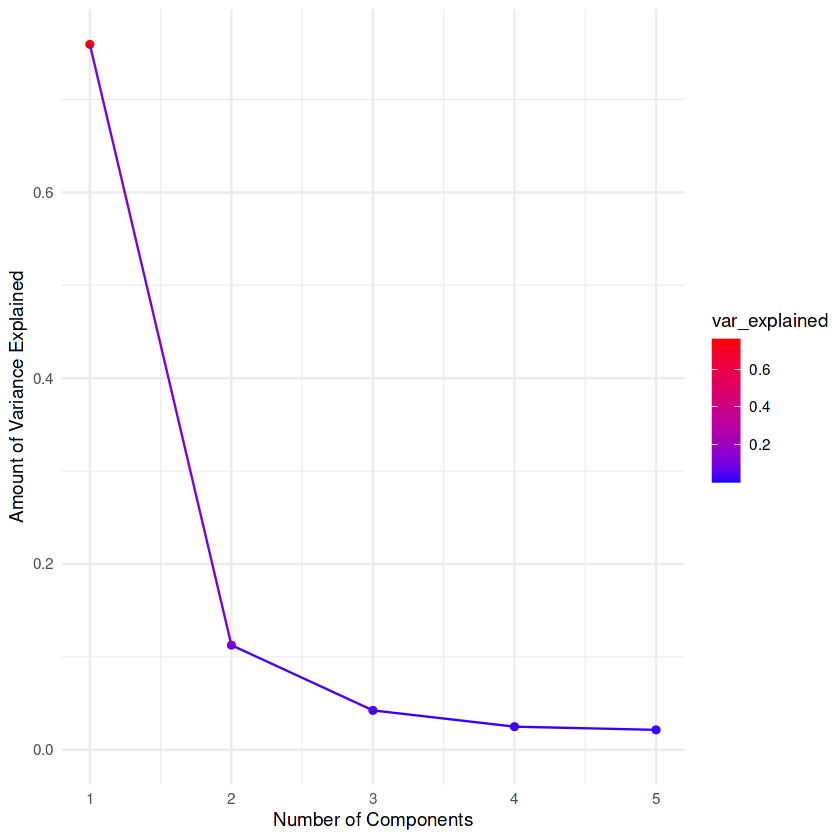

In [14]:


coffee%>%
select(c("Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Altitude","Overall","Total_Cup_Points")) -> coffee_taste_wscore

coffee_taste_wscore <- na.omit(coffee_taste_wscore)

pca_coffee_wscore <- prcomp(coffee_taste_wscore, scale = TRUE, center = TRUE, retx = TRUE)
summary(pca_coffee_wscore)

var_explained = pca_coffee_wscore$sdev^2/sum(pca_coffee_wscore$sdev^2)

ggplot(as.data.frame(var_explained), mapping = aes(x = var_explained, y = as.integer(1:9), color = var_explained)) + 
geom_point() + geom_line(aes(x = var_explained)) + 
coord_flip() + ylab(label = "Number of Components") + ylim(c(1,5)) + xlab("Amount of Variance Explained") + 
theme_minimal() + scale_color_gradient(low="blue", high="red")

Importance of components:
                          PC1     PC2    PC3     PC4     PC5     PC6
Standard deviation     2.2217 0.63578 0.4744 0.44234 0.34919 0.34225
Proportion of Variance 0.8227 0.06737 0.0375 0.03261 0.02032 0.01952
Cumulative Proportion  0.8227 0.89004 0.9275 0.96015 0.98048 1.00000

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


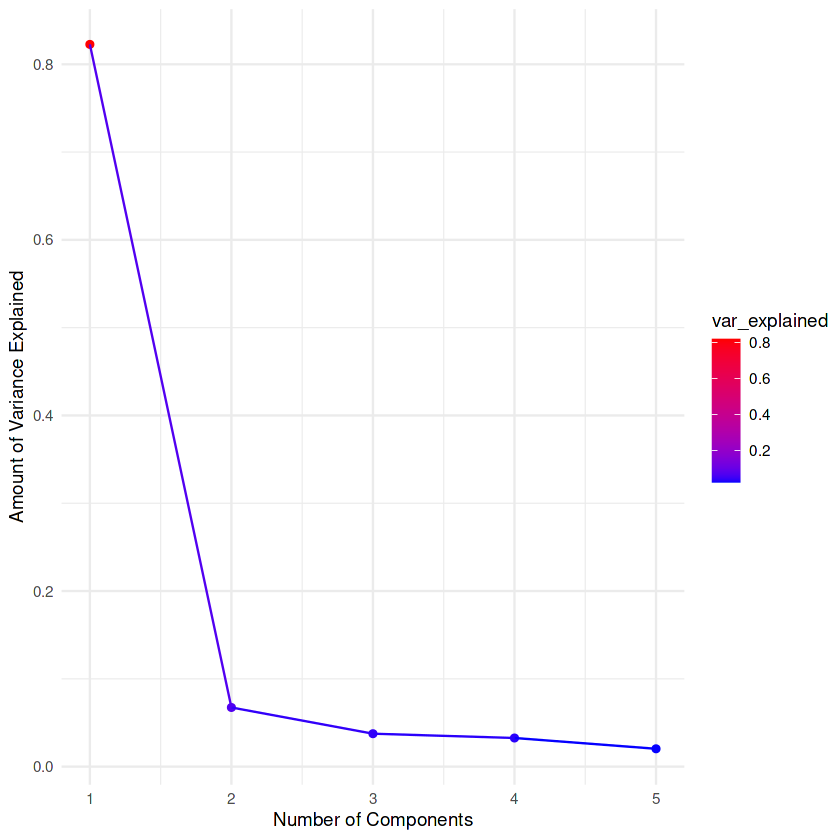

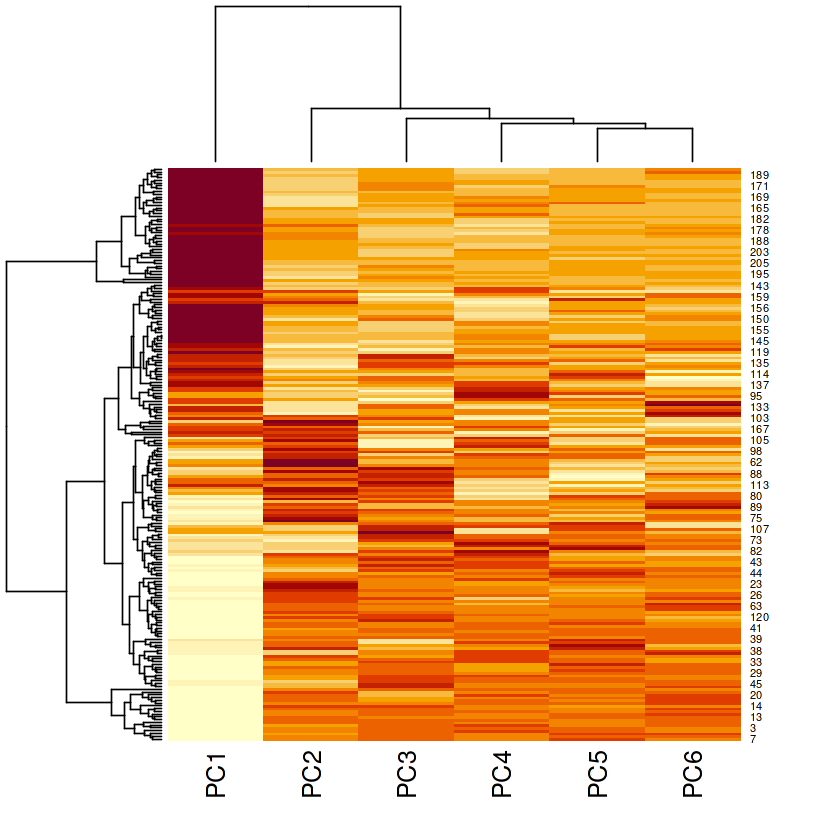

In [15]:
coffee%>%
select(c("Aroma","Flavor","Aftertaste","Acidity","Body","Balance")) -> coffee_taste

coffee_taste <- na.omit(coffee_taste)

pca_coffee <- prcomp(coffee_taste, scale = TRUE, center = TRUE)
summary(pca_coffee)

var_explained = pca_coffee$sdev^2/sum(pca_coffee$sdev^2)

ggplot(as.data.frame(var_explained), mapping = aes(x = var_explained, y = as.integer(1:6), color = var_explained)) + 
geom_point() + geom_line(aes(x = var_explained)) + 
coord_flip() + ylab(label = "Number of Components") + ylim(c(1,5)) + xlab("Amount of Variance Explained") + 
theme_minimal() + scale_color_gradient(low="blue", high="red")

coffee_taste$PC <- pca_coffee$x[,1]


heatmap(as.matrix(pca_coffee$x))

## Finally For fviz plot you can use the following code on your machine. Sadly Kaggle doesn't support it therefore I directly uploaded the graph. 
##factoextra::fviz_pca_biplot(pca_coffee,habillage = coffee$Country_of_Origin, title = "Coffee Taste and Regions", geom = "point")



#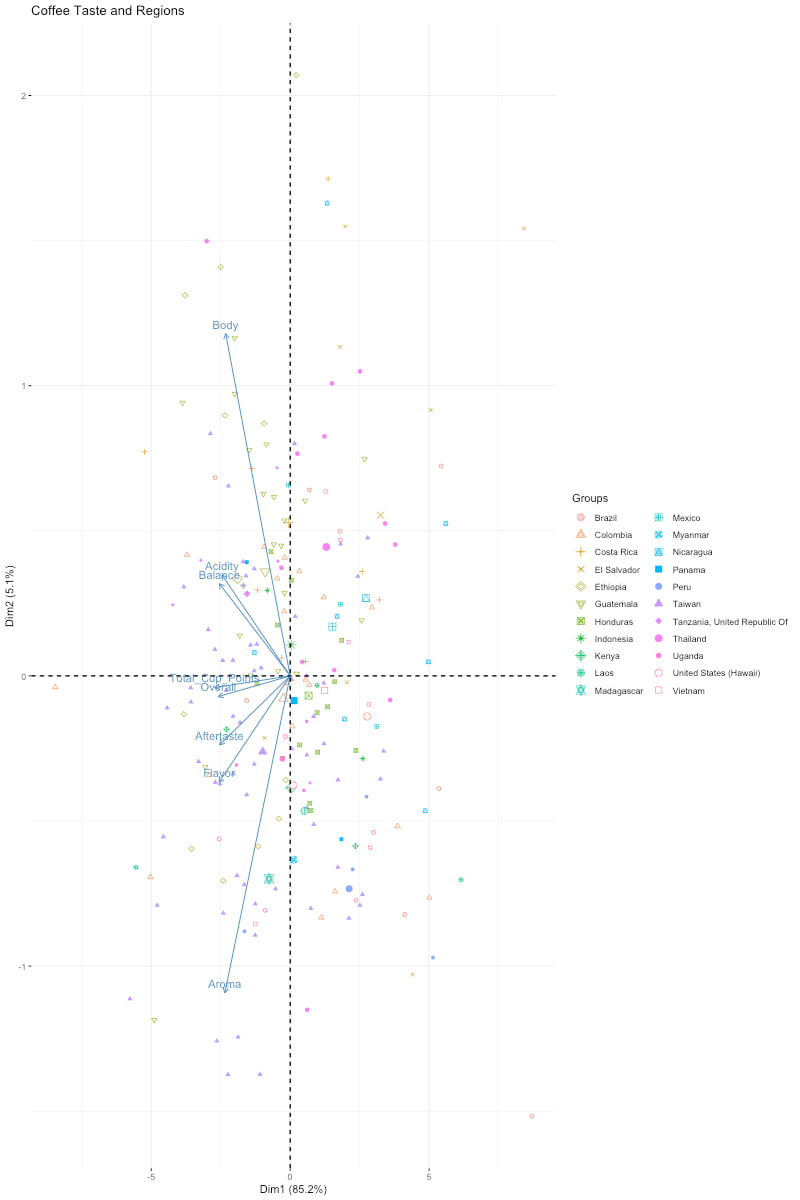

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6
Standard deviation     2.4492 0.02223 0.01635 0.01543 0.01252 0.01164
Proportion of Variance 0.9998 0.00008 0.00004 0.00004 0.00003 0.00002
Cumulative Proportion  0.9998 0.99987 0.99991 0.99995 0.99998 1.00000

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


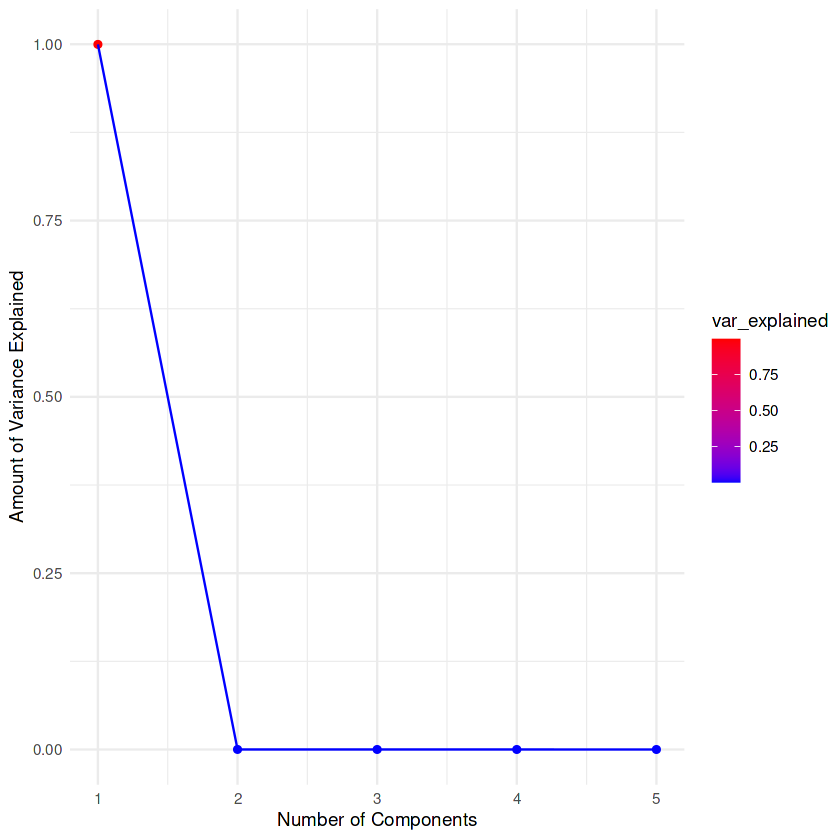

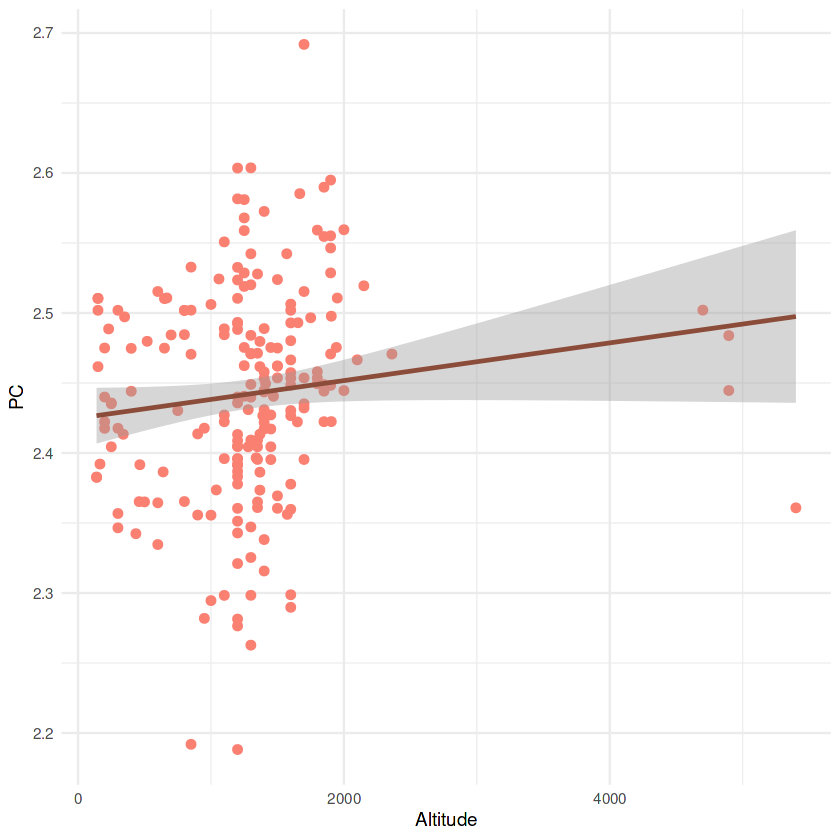

In [16]:
## Without Centering
coffee%>%
select(c("Aroma","Flavor","Aftertaste","Acidity","Body","Balance")) -> coffee_taste

coffee_taste <- na.omit(coffee_taste)

pca_coffee <- prcomp(coffee_taste, scale = TRUE, center = FALSE)
summary(pca_coffee)

var_explained = pca_coffee$sdev^2/sum(pca_coffee$sdev^2)

ggplot(as.data.frame(var_explained), mapping = aes(x = var_explained, y = as.integer(1:6), color = var_explained)) + 
geom_point() + geom_line(aes(x = var_explained)) + 
coord_flip() + ylab(label = "Number of Components") + ylim(c(1,5)) + xlab("Amount of Variance Explained") + 
theme_minimal() + scale_color_gradient(low="blue", high="red")

coffee_taste$PC <- pca_coffee$x[,1]
coffee$PC <- pca_coffee$x[,1]
coffee$PC <- -coffee$PC

ggplot(coffee, mapping =  aes(x = Altitude, y = PC)) + geom_point(size = 2, color = "Salmon") + 
geom_smooth(color = "Salmon4", method = "lm") + theme_minimal() 


Without centering we can explain the columns related to the taste with just one component. Therefore, we have successfully decreased the dimensions of data. Now all taste related columns are gathered under "PC". 

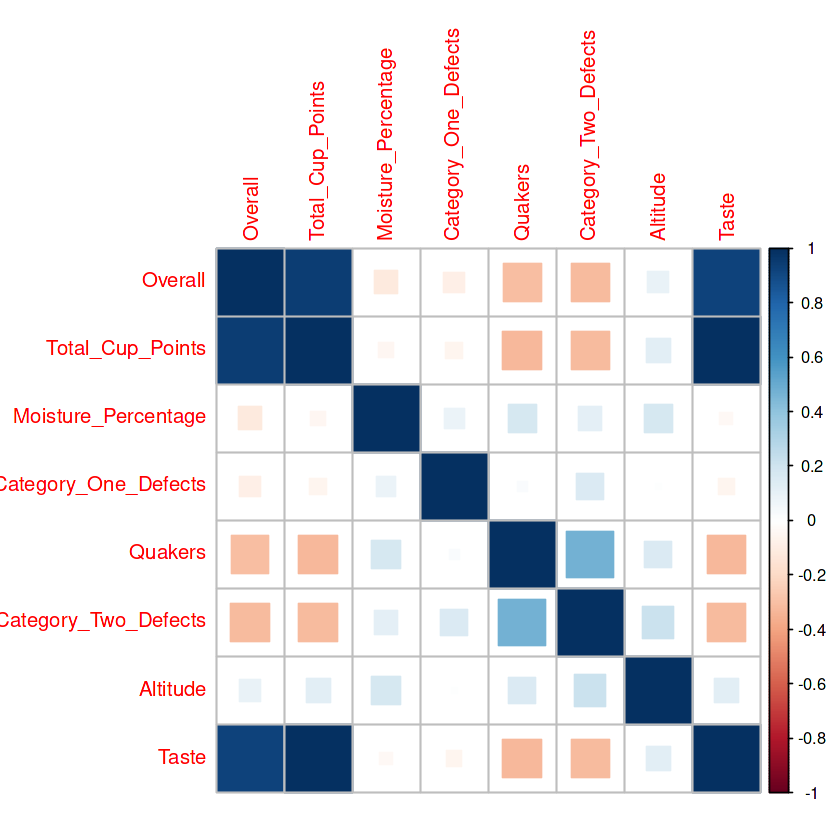

In [17]:
coffee_numeric%>%select(!c("Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Uniformity")) -> coffee_numeric_less

coffee_numeric_less$Taste <- coffee$PC
coffee_numeric_less <- na.omit(coffee_numeric_less)
corrplot::corrplot(cor(coffee_numeric_less), method = "square")

We decided to leave the overall and total cup points in the graph to compare different regions. Now we are going to bind numeric and categorical variables and dive deep.

# Categorical Variables Cleaning



In [18]:
str(coffee_non_numeric)
coffee_non_numeric <- as.data.frame(coffee_non_numeric)

coffee_non_numeric%>%count(Color)



List of 8
 $ Country_of_Origin: Factor w/ 22 levels "Brazil","Colombia",..: 2 17 10 3 2 6 17 17 17 18 ...
 $ Farm_Name        : Factor w/ 172 levels "-","917農場 (917 Farm)",..: 40 95 89 70 46 68 163 118 119 81 ...
 $ Mill             : Factor w/ 162 levels "5.2Ha","917農場 (917 Farm)",..: 51 95 86 69 54 33 153 111 113 56 ...
 $ Region           : Factor w/ 120 levels "( Dongshan Dist., Tainan City)",..: 79 27 53 57 81 28 27 27 27 49 ...
 $ Harvest_Year     : Factor w/ 7 levels "2017 / 2018",..: 4 4 4 5 5 5 4 4 4 6 ...
 $ Variety          : Factor w/ 48 levels "Bourbon","Bourbon Sidra",..: 5 20 21 20 30 20 20 39 38 1 ...
 $ Processing_Method: Factor w/ 10 levels "Anaerobico 1000h",..: 2 9 7 9 4 9 9 5 9 9 ...
 $ Color            : Factor w/ 12 levels "blue-green","bluish-green",..: 5 1 12 5 11 5 5 9 6 6 ...


Color,n
<fct>,<int>
blue-green,12
bluish-green,21
browish-green,1
brownish,9
green,101
greenish,36
pale yellow,6
yello-green,1
yellow green,5


Let's start with color. There exists typo mistakes in the color section. Let's create a standart.

In [19]:

coffee_non_numeric%>%mutate(Color = case_when(Color == "browish-green"~"Brownish-Green", 
Color == "yello-green"~"Yellow-Green", 
Color == "yellow green"~"Yellow-Green", 
Color == "yellow- green"~"Yellow-Green", 
Color == "yellow-green"~ "Yellow-Green",
Color == "blue-green"~"Blue-Green",
Color == "bluish-green"~"Bluish-Green",
Color == "brownish"~"Brownish",
Color == "green"~"Green",
Color == "greenish"~"Greenish",
Color == "pale yellow"~"Pale Yellow",
Color == "yellowish"~"Yellowish")) -> coffee_non_numeric

## There exists easier ways such as string distance to do this instead of mutate, nonetheless, typos do not vary that much. 




In [20]:
coffee_non_numeric$Variety[which(coffee_non_numeric$Variety == "unknown")] <- NA
coffee_non_numeric$Variety[which(coffee_non_numeric$Variety == "unknow")] <- NA
coffee_non_numeric%>%count(Variety)
coffee_non_numeric$Color <- as.factor(coffee_non_numeric$Color)
coffee_non_numeric[-106,] -> coffee_non_numeric
cbind(coffee_non_numeric, coffee_numeric_less) -> coffee

Variety,n
<fct>,<int>
Bourbon,17
Bourbon Sidra,1
"Bourbon, Catimor, Caturra, Typica",1
"BOURBON, CATURRA Y CATIMOR",1
Castillo,1
Castillo and Colombia blend,1
Castillo Paraguaycito,1
"Castillo,Caturra,Bourbon",1
Catimor,11


Now, every categorical variables look normal. We can dive deep and check few questions. 

# Which Coffee ?

## Which Color of Coffee Tastes Better?

Let's focus on the bean colors! 


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


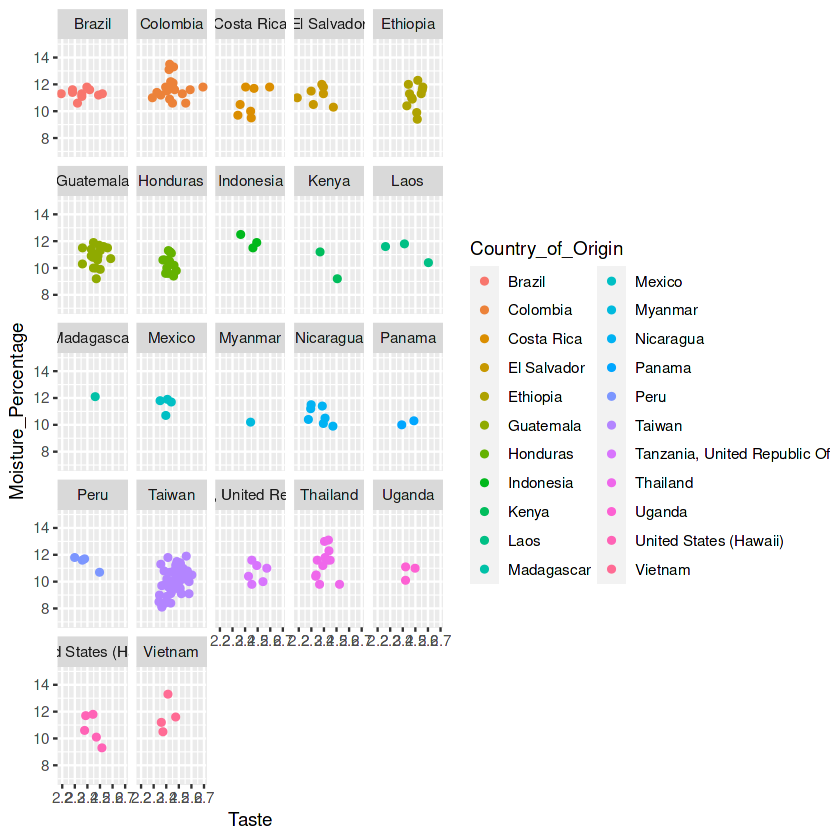

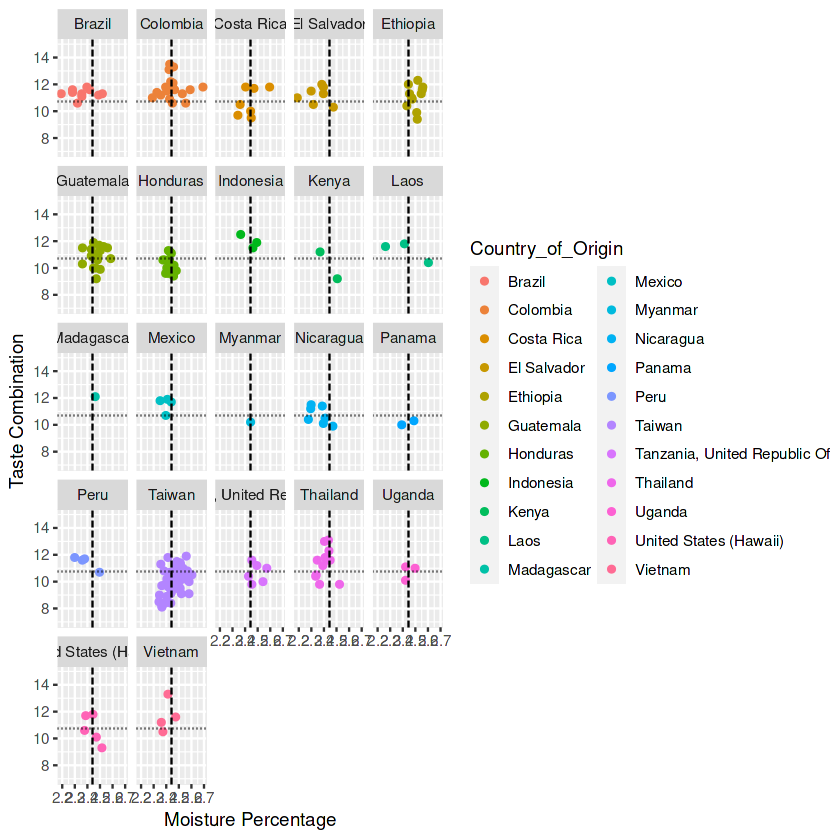

In [21]:
coffee%>%ggplot(mapping = aes(x = Taste, y = Moisture_Percentage, color = Country_of_Origin)) + geom_point() + ylim(c(7,15)) + facet_wrap(~Country_of_Origin)

## Adding Mean Taste Line and Mean Moisture Line

coffee%>%ggplot(mapping = aes(x = Taste, y = Moisture_Percentage, color = Country_of_Origin)) + 
geom_point() + ylim(c(7,15)) + 
geom_vline(xintercept = mean(coffee$Taste), linetype = "longdash") + 
facet_wrap(~Country_of_Origin)  + 
geom_hline(yintercept = mean(coffee$Moisture_Percentage), linetype = "dotted") + xlab("Moisture Percentage") + ylab("Taste Combination")

Great! Now we can check out which coffee is more moisturized and which one taste better according to their country of origin. We can also check the taste, moisture and the brewing technique. 

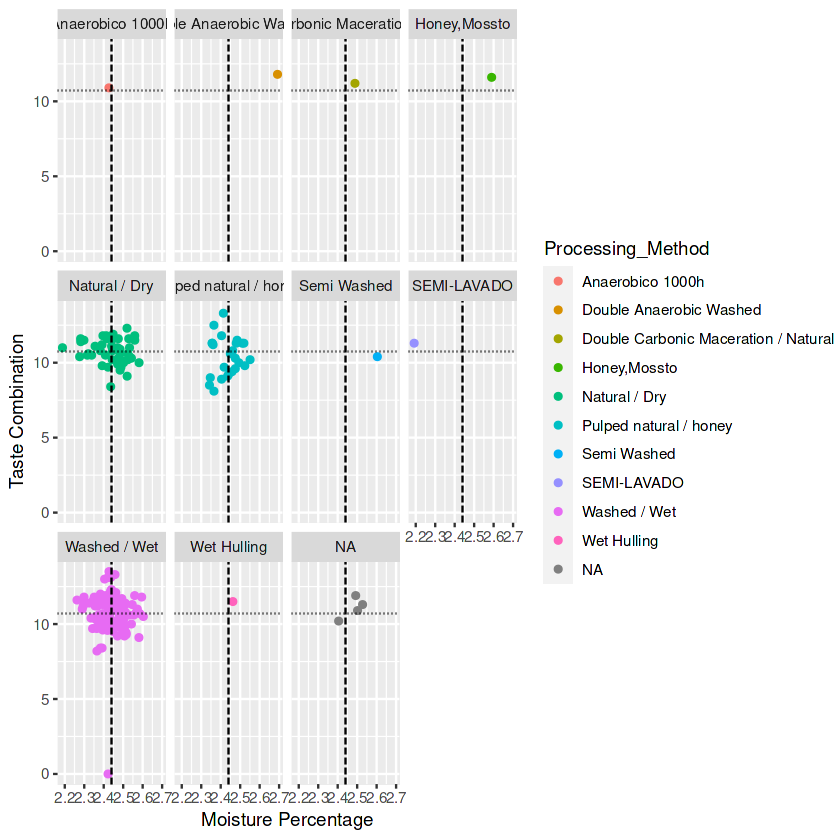

In [22]:
coffee%>%ggplot(mapping = aes(x = Taste,  y = Moisture_Percentage, color = Processing_Method)) + geom_point() + facet_wrap(~Processing_Method) + geom_hline(yintercept = mean(coffee$Moisture_Percentage), linetype = "dotted") + 
xlab("Moisture Percentage") + ylab("Taste Combination") + geom_vline(xintercept = mean(coffee$Taste), linetype = "longdash")

Which country raises their coffee beans in a higher altitude? 

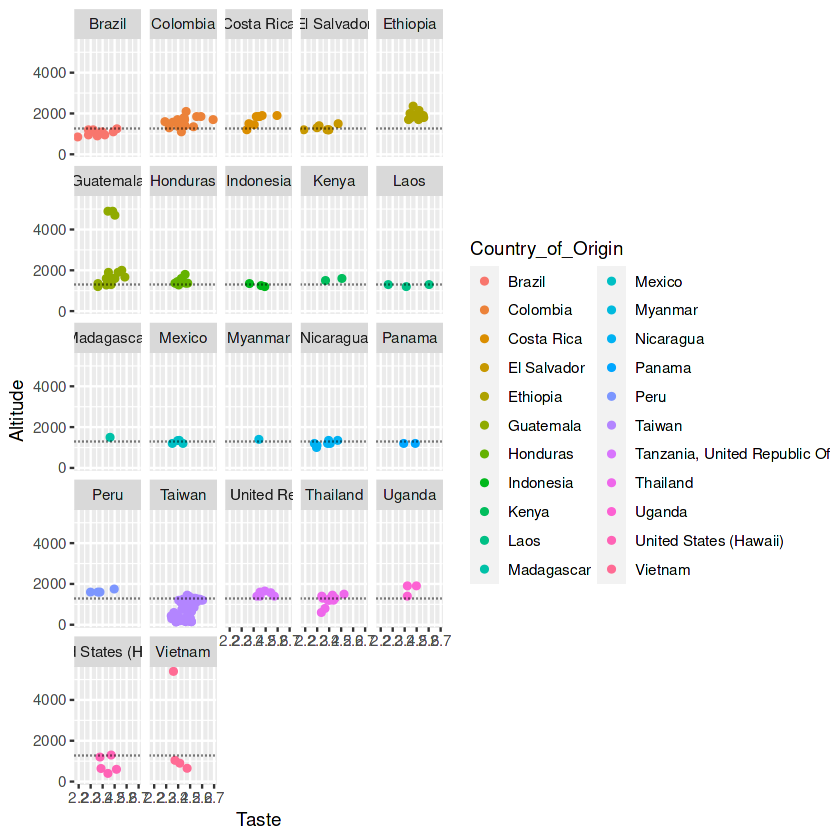

In [23]:
coffee%>%ggplot(mapping = aes(x = Taste, y = Altitude, color = Country_of_Origin)) + geom_point() + facet_wrap(~Country_of_Origin) + geom_hline(yintercept = mean(coffee$Altitude), linetype = "dotted")

# P.S.

Hello everyone! I hope so far everything is okay, if not please feel free to comment on the notebook. If you think some bits are off, please share! 

If you like the notebook, do not forget to upvote :) Take care! 